# K-Means usando Scikit Learn

In [154]:
import pandas as pd 
from pandas.plotting import parallel_coordinates
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
import matplotlib.pyplot as plt
import datetime

In [155]:
df = pd.read_csv('minuto.csv')
df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [156]:
#limpieza de las columnas de lluvia y de los datos nulos
del df['rain_accumulation']
del df['rain_duration']
df = df.dropna()

In [157]:
df.columns #se ven todas las columnas de la tabla para elegir las necesarias para alimentar el sistema. Estas son las "features" (x) 

features = [
    'air_pressure', 'air_temp', 'avg_wind_direction',
    'avg_wind_speed', 'max_wind_direction', 'max_wind_speed',
    'relative_humidity']
x = df[features]

In [158]:
scale = StandardScaler().fit_transform(x)
model = KMeans(n_clusters=10).fit(scale) #se indica el nº de clusters a generar

centers = model.cluster_centers_
print(centers) #los centros son puntos multidimensionales (cada columna de features se toma como una dimensión)

c:\Users\pbartolome\AppData\Local\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 1.40447364 -0.10438216 -1.11196503 -0.11785824 -0.97256158 -0.09980611
  -0.96849156]
 [-0.2098311   0.59155433  0.40528405  0.6708841   0.51180673  0.6119004
  -0.15731369]
 [-0.21728617 -1.07689948  0.52710165 -0.25035606  0.6731621  -0.24686607
   1.26828443]
 [-1.14427417 -0.97450847  0.4282015   1.68405848  0.5238037   1.65260517
   1.03607105]
 [ 1.18201565 -0.2487209  -1.1523674   2.09725962 -1.05151725  2.21623859
  -1.12833426]
 [ 0.24400727  0.31270614  1.88831045 -0.65113639 -1.54831178 -0.57424468
  -0.29399775]
 [-0.20344161  0.5887097   0.20634835 -0.6322246   0.3827493  -0.64452792
  -0.38989457]
 [ 0.02530962 -0.7780598  -1.17151845 -0.57753889 -1.01350208 -0.59150113
   0.88449252]
 [-0.17381142  0.85489349 -1.30739822 -0.57708227 -1.1663879  -0.59251617
  -0.63236593]
 [ 0.32499962  0.68849002  1.3357639  -0.6335658   1.6007887  -0.58565998
  -0.68267053]]


In [159]:
#se crea una tabla a partir de los centros obtenidos, indicando para cada una de sus dimensiones la columna (tipo de dato) a la que pertenecen
features.append('cluster_prediction') #se añade una columna para indicar al clúster que pertenece el centro
Z = [np.append(A, index) for index, A in enumerate(centers)]

centers_table = pd.DataFrame(Z, columns=features)
centers_table['cluster_prediction'] = centers_table['cluster_prediction'].astype(int)
centers_table

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,cluster_prediction
0,1.404474,-0.104382,-1.111965,-0.117858,-0.972562,-0.099806,-0.968492,0
1,-0.209831,0.591554,0.405284,0.670884,0.511807,0.611900,-0.157314,1
2,-0.217286,-1.076899,0.527102,-0.250356,0.673162,-0.246866,1.268284,2
3,-1.144274,-0.974508,0.428201,1.684058,0.523804,1.652605,1.036071,3
4,1.182016,-0.248721,-1.152367,2.097260,-1.051517,2.216239,-1.128334,4
5,0.244007,0.312706,1.888310,-0.651136,-1.548312,-0.574245,-0.293998,5
6,-0.203442,0.588710,0.206348,-0.632225,0.382749,-0.644528,-0.389895,6
7,0.025310,-0.778060,-1.171518,-0.577539,-1.013502,-0.591501,0.884493,7
8,-0.173811,0.854893,-1.307398,-0.577082,-1.166388,-0.592516,-0.632366,8
9,0.325000,0.688490,1.335764,-0.633566,1.600789,-0.585660,-0.682671,9


In [166]:
#función para generar un plot paralelo que muestre el conjunto de clústers que cumplen ciertas características
#se muestran los valores de los centros multidimensionales (el valor de cada columna)
#se puede apreciar la configuración que tendría que tener un "punto" para cumplir con las condiciones (por ejemplo para que sea un día seco)
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,5)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'cluster_prediction', color = my_colors, marker='o')

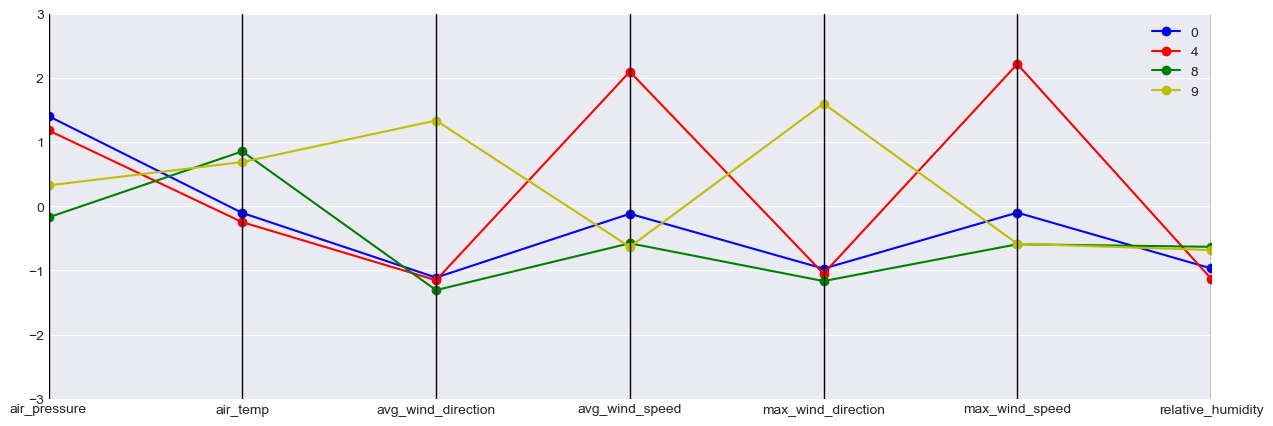

In [167]:
#gráfico de días secos
dry_filter = centers_table['relative_humidity'] < -0.5 #se crea un filtro
centers_table[dry_filter] #se aplica el filtro a la tabla de centros
parallel_plot(centers_table[dry_filter]) #se genera con los datos filtrados

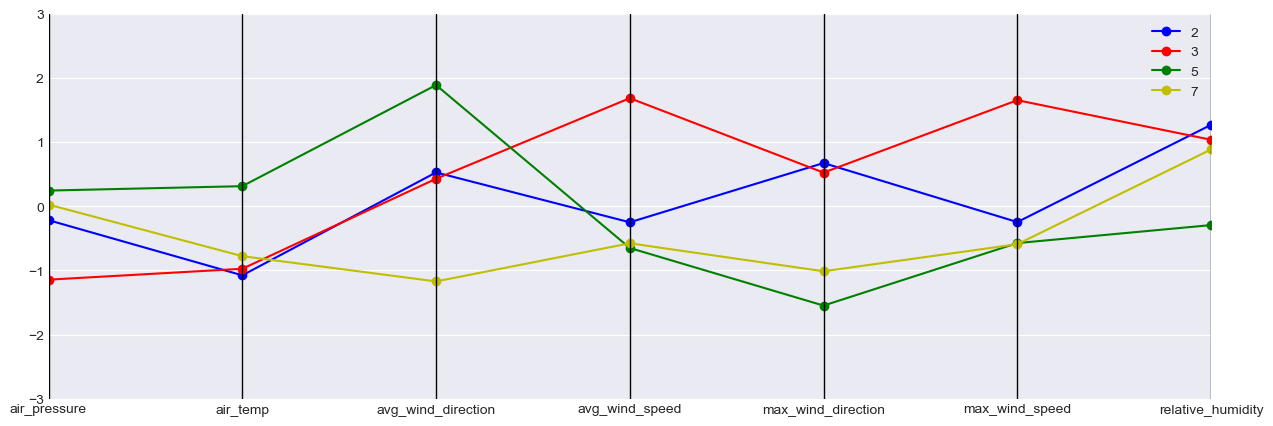

In [168]:
#gráfico de días frescos
cool_filter = (centers_table['relative_humidity'] > -0.5) & (centers_table['air_temp'] < 0.5) #se crea un filtro
centers_table[cool_filter] #se aplica el filtro a la tabla de centros
parallel_plot(centers_table[cool_filter]) #se genera con los datos filtrados